In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.api import Holt


filename = "emission data.csv"
emission_df = pd.read_csv(filename, index_col=0)

/home/brendan/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Functions

In [2]:
# converting index to DateTime object
def convert_index(emission_data):
    emission_data.index = pd.to_datetime(emission_data.index)
    return emission_data

In [3]:
#convert_index(emission_df.loc['Canada', '1870':'1917'])

In [3]:
# get data to plot
def plot_emissions(country, start_year = '1751', end_year = '2017'):
    emissions_data = emission_df.loc[country, start_year:end_year]
    return convert_index(emissions_data)

In [4]:
# calculate the rate of growth and return value as %
def calculate_growth_percent(country, year1, year2):
    growth_percent = ((emission_df.loc[country, year2] - emission_df.loc[country, year1])/emission_df.loc[country, year1])*100
    return growth_percent.round(1)

In [5]:
# Gathering data for last 41 years to forecast emissions
def country_to_forecast(country):
    country_data = emission_df.loc[country].tail(41)
    return convert_index(country_data)


In [6]:
# calculate and return forecasted data
def get_historical_data(country_fcast):
    country_hist_data = country_to_forecast(country_fcast)
    return country_hist_data

In [7]:
def get_fitted_data(historical_data):
    country_fitted_data = Holt(historical_data).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
    return country_fitted_data

In [8]:
def get_forecast_data(fitted_data):
    country_fcast_data = fitted_data.forecast(30)
    return country_fcast_data

# Hypothesis and Graphs

Populating the interactive namespace from numpy and matplotlib


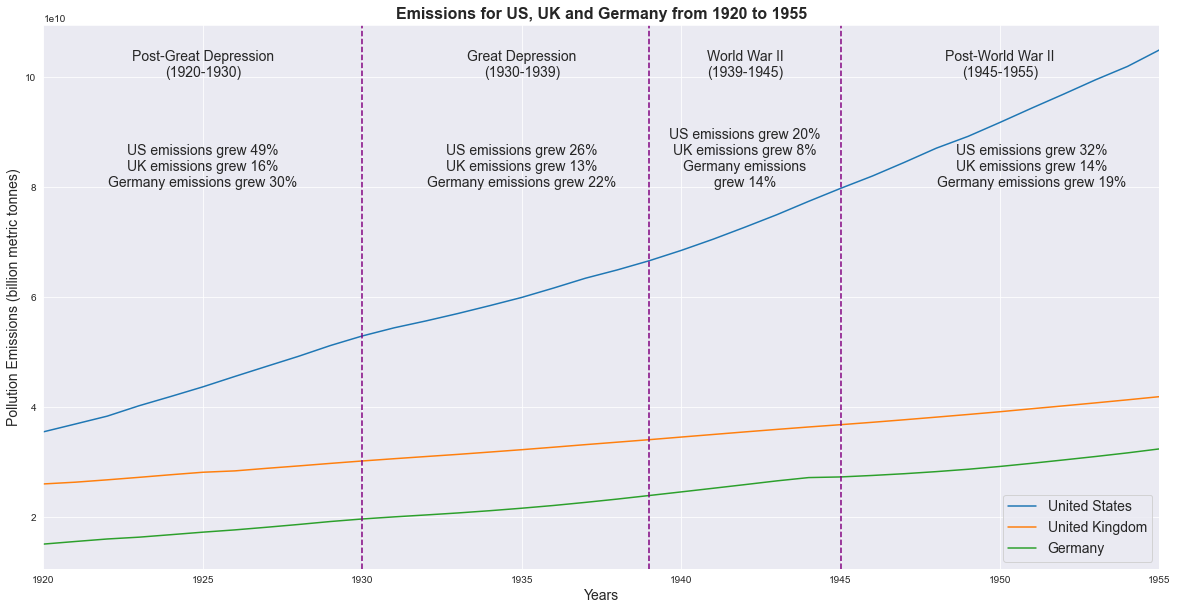

In [9]:
country_list = ['United States','United Kingdom', 'Germany']

%pylab inline
plt.rcParams["figure.figsize"] = (20,10)
sns.set_style("darkgrid")
beginning_year = '1920'
end_year = '1955'
ax = plt.gca()

for country in country_list:
    plot_emissions(country, beginning_year, end_year).plot(ax = ax)

plt.ylabel('Pollution Emissions (billion metric tonnes)', fontsize=14)
plt.ticklabel_format(axis='y', style='sci', scilimits=(10,10))
plt.xlabel('Years', fontsize=14)
plt.title("Emissions for US, UK and Germany from 1920 to 1955", fontsize=16, fontweight='bold')
plt.axvline('1930', color='purple', linestyle = '--')
plt.text('1925', 100000000000, "Post-Great Depression\n(1920-1930)", fontsize=14, horizontalalignment='center')
plt.axvline('1939', color='purple', linestyle = '--')
plt.text('1935', 100000000000, "Great Depression\n(1930-1939)", fontsize=14, horizontalalignment='center')
plt.axvline('1945', color='purple', linestyle = '--')
plt.text('1942', 100000000000, "World War II\n(1939-1945)", fontsize=14, horizontalalignment='center')
#plt.axvline('1950', color='purple', linestyle = '--')
plt.text('1950', 100000000000, "Post-World War II\n(1945-1955)", fontsize=14, horizontalalignment='center')
plt.text('1925', 80000000000, "US emissions grew 49%\nUK emissions grew 16%\nGermany emissions grew 30%", \
         fontsize=14, horizontalalignment='center')
plt.text('1935', 80000000000, "US emissions grew 26%\nUK emissions grew 13%\nGermany emissions grew 22%", \
         fontsize=14, horizontalalignment='center')
plt.text('1942', 80000000000, "US emissions grew 20%\nUK emissions grew 8%\nGermany emissions\ngrew 14%", \
         fontsize=14, horizontalalignment='center')
plt.text('1951', 80000000000, "US emissions grew 32%\nUK emissions grew 14%\nGermany emissions grew 19%", \
         fontsize=14, horizontalalignment='center')
ax.legend(loc='lower right', fontsize=14)
plt.show()

<b>Abstract</b> <br>
Examining the emissions of the United States, United Kingdom and Germany from 1920 to 1955. This covers Post-Great Depression (1920-1930), Great Depression (1930-1939), World War II (1939-1945) and Post-World War II (1945-1955) time periods. What caused these emissions? What was the primary source of energy? What was the reason for the demand in energy?

<b>1920s: Pre-Great Depression</b> <br>
<u>United States:</u> The United States experienced a large growth with industrialization. It was the age of the skyscrapers. Construction of large commercial buildings like The Chrysler Building, Paramount Building, Bank of Manhattan Trust Building (now Trump Tower), The Empire State Building and the City Bank-Farmers Trust Building are some of the skyscraper projects that began in the 1920s. Florida experienced a real estate and housing bubble which burst in 1925 that saw the housing construction exceed the population growth by 25%. The Chicago area also experienced a housing bubble with over a million lots of housing construction with only 950 thousand occupied.

From 1920 to 1930 the emission growth rate was 49.2% and this was largely due to coal power plants generating energy for the manufacture of cement and steel used in building construction. Coal consumption in the 1920s was at 594,381 thousand tonnes and this figure was not passed until the 1980s.

<u>United Kingdom:</u> Manufacturers and suppliers of goods during World War I had prospered and become very rich. Young members of the aristocracy and wealthier classes enjoyed a hedonistic lifestyle as nightclubs, jazz clubs and cocktail bars flourished in cities.

By the mid 1920s the post-war prosperity was ending. UK exports were expensive due to high interest rates and the UK was now importing more coal than it was mining. UK’s economy started to decline due to the lack of investment in mass-production techniques in industry. Unemployment had risen to over 2 million with northern England and Wales reaching almost 70% unemployment. This lead to the Great Strike of 1926.

Coal was the main source of electricity generation during the 1920s and consumption peaked as the UK started to import more coal. This was the era of grid construction and the introduction of electric lighting to homes and factories. UK's emissions grew 16.1% from 1920 to 1930.

<u>Germany:</u> The defeat in World War I left Germany economically devastated and was forced to pay incredibly sizable reparations to France and the UK due to the Versailles treaty. Germany focused on social spending to recover from the war by creating transportation projects (German National Railway implemented new construction standards), gas works and modernization of power plants. This increase in spending and decrease in revenues caused deficits that added to Germany's economic problems. Inflation reached a point where millions of Deutsche marks were worthless.

Coal along with a synthetic liquid fuel from coal were the main sources of energy for Germany. Germany's emissions level grew by 30.4% which was probably due to the energy demand of the transportation projects and modernization of its power plants. 

<b>1930s: Great Depression</b> <br>
<u>United States:</u>
From 1930 to 1939 the emissions growth rate dropped to 25.9%. Coal consumption started to decline. By 1933 unemployment reached 25% with hundreds of thousands of Americans ended up homeless. In response, President Hoover and Congress approved the Federal Home Loan Bank Act, to spur new home construction, and reduce foreclosures.

<u>United Kingdom:</u>
The United Kingdom had not yet recovered fully from World War I when they were hit by the Great Depression. By 1931 unemployment had more than doubled to 20% and exports had fallen in value by 50%. North eastern towns and cities suffered almost a 70% unemployment rate as industries like shipbuilding fell by 90%. A growing southern population and middle class triggered a growth in manufacture of electrical goods and motor cars.

<u>Germany:</u>
The Great Depression hit Germany hard with American Banks cancelling loans that had been funding repayments which lead to the collapse of the Credit Anstalt in Vienna in May, 1931. This put Germany in turmoil due to the rise in violence of Nazi and communist movements. Investors withdrew their short-term money from Germany, as confidence spiraled downward. The unemployment rate reached nearly 30% in 1932 which increased support for the Nazi and communist parties. When the Nazi party took control, Hitler created a network of client states and economic allies in Latin America. Unemployment fell significatly by 1935 when Hitler cut wages, took control of labour unions and public works spending. A focus on large scale military spending played a major role in the recovery.



<b>1940s: World War II</b> <br>
<u>United States:</u> The United States joined World War II in 1941 when the Japanese bombed Pearl Harbour. Until that point the country morale was low and unemployment hovered around 15% but the switch to a producer of war materials saw a boost to its struggling civilian economy. By 1942, automobile manufacturing came to a halt as manufacturers retooled for wartime production. Chrysler, Ford and GM manufactured airplanes, trucks, marine diesels, guns and shells. Fewer than 6,000 planes were produced in 1939 where as more than 96,000 were produced in 1944.<br>
The construction industry too changed focus between 1939 to 1945. In 1939 there were 6,062 buildings (commercial, military and residential) completed and that number more than doubled to 13,353 in 1942.<br>
From 1939 to 1945 coal was the major source of energy followed by petroleum. The US emissions grew 20% during this period as energy demand was mainly focused on the manufacturing of military structures, vehicles and arms.

<u>United Kingdom:</u> France and Britain had warned Germany against invading Poland but Germany ignored their warning and invaded Poland in September 1939.<br>
The British Empire along with the Commonwealth was fighting the War on two fronts: in Europe and N. Africa against Germany and Italy and in Asia against Japan. With a relatively small population of 47 million Britain was limited in the war economy and armed forces. While civilian population was rationed and labour allocated to the war machine, Britain managed to produce approximately 15,000 aircraft and 22,000 tanks. This was relatively low compared to the US 32,000 aircraft and 75,000 tanks.<br>
The lower 8% growth in emissions is likely due to the change in focus to production of aircraft, tanks and trucks instead of civilian projects.

<u>Germany:</u> Germany’s access to petroleum, sugar, coffee, chocolate and cotton were restricted by a British blockade at the start of the war. Germany relied on coal gasification and oil from Romania as energy sources. Also, relied on the Soviet Union for supplies of grain and raw materials which they paid for with weapons and industrial machinery.<br> 
By mid 1943, Germany switched to a full war economy. This was a dramatic rise in military production with an increase in tanks and aircraft production. Close to 25,000 aircraft and 20,000 tanks were produced in 1943 compared to 15,000 aircraft and 9.000 tanks in 1942.<br>
German factories and cities were being destroyed by allied bombings that began in 1944. Synthetic fuel, tanks and explosives production was down 86%, 35% and 42% respectively. Food was drastically scarce and close to 300,000 men were employed to repairing oil installations. This is possibly why German emissions growth dropped to 0.4% from 1944 to 1945 where as the emissions growth for 1942-43 was 2.6% and 1943-44 was 2.3%.<br>
During the World War II years, Germany had an overall emissions growth of 14%

<b>1950s: Post-World War</b> <br>
<u>United States:</u> The Golden Age of Capitalism is the common name for the post World War II economic boom which lasted after the war ended until the early 1970s. The population growth, economic growth, rapid urbanization led to a dramatic increase in the number of cars, trucks and highways that were built.<br>
During the late 1940s automobile production was slow as companies retooled and there was a shortage of materials but the early 1950s ushered in newer designs with larger cars and larger engines. Approximately 73.7 million cars and trucks sold during the 1950s, which lead to an increased oil consumption increased and automobile pollution.<br>
Post World War II, saw a rise in population which led to housing being constructed outside the city centre. This suburbanization construction along with the growing network of interstate highways allowed firms to follow the worker. Companies now had the option of building factories outside of the city and workers had the ability to travel from theirs homes in the suburb to the factories.<br>
From 1945 to 1955 the emissions growth rate was 32%. Coal consumption dropped and was surpassed by oil.

<u>United Kingdom:</u>

<u>Sources:</u>

* https://www.wri.org/blog/2014/05/history-carbon-dioxide-emissions
* https://www.widewalls.ch/1920s-architecture/
* https://geology.com/articles/history-of-energy-use/
* https://www.mdpi.com/1996-1073/7/12/7955/pdf
* https://www.cambridge.org/core/journals/historical-journal/article/evolution-of-energy-demand-in-britain-politics-daily-life-and-public-housing-1920s1970s/C60106A45CBD0E469EE46CF8192E6F37
* https://www.planete-energies.com/en/medias/saga-energies/history-energy-united-kingdom
* https://en.wikipedia.org/wiki/Great_Depression#United_Kingdom
* https://www.historic-uk.com/HistoryUK/HistoryofBritain/The-1920s-in-Britain/
* http://euanmearns.com/uk-electricity-generation-statistics-1920-2012/
* http://marcuse.faculty.history.ucsb.edu/classes/33d/projects/1920s/Econ20s.htm
* https://www.planete-energies.com/en/medias/saga-energies/history-energy-germany
* https://en.wikipedia.org/wiki/History_of_rail_transport_in_Germany#Deutsche_Reichsbahn_(1920%E2%80%931945)
* https://www.sciencedirect.com/science/article/abs/pii/037877539280059K
* https://www.americanmachinist.com/archive/features/article/21896269/1940s
* http://www.sjsu.edu/faculty/watkins/eggli.htm
* https://fraser.stlouisfed.org/files/docs/publications/bls/bls_0915_1948.pdf
* http://www.british-history.co.uk/ww2-economy.html
* https://en.wikipedia.org/wiki/Economy_of_Nazi_Germany#Wartime_policies:_1939%E2%80%931945
* https://www.epa.gov/transportation-air-pollution-and-climate-change/accomplishments-and-success-air-pollution-transportation
* https://en.wikipedia.org/wiki/American_automobile_industry_in_the_1950
* https://en.wikipedia.org/wiki/Automotive_industry_in_the_United_States
* https://scholar.princeton.edu/sites/default/files/lboustan/files/research21_urban_handbook.pdf
* https://www.historyofengland.net/world-war-ii
* https://www.historyofengland.net/modern-general-history/english-society-and-values-over-the-last-75-years


MISC:
* https://ww2db.com/country/united_kingdom

* https://www.mercatus.org/publications/economic-history/economic-recovery-lessons-post-world-war-ii-period
* https://en.wikipedia.org/wiki/Post%E2%80%93World_War_II_economic_expansion
* https://ourworldindata.org/fossil-fuels


In [10]:
print("Post-Great Depression (1920-30):")
print("US:",calculate_growth_percent('United States', '1920', '1930'))
print("UK:",calculate_growth_percent('United Kingdom', '1920', '1930'))
print("Germany:",calculate_growth_percent('Germany', '1920', '1930'))
print("\nGreat Depression (1930-39):")
print("US:",calculate_growth_percent('United States', '1930', '1939'))
print("UK:",calculate_growth_percent('United Kingdom', '1930', '1939'))
print("Germany:", calculate_growth_percent('Germany', '1930', '1939'))
print("\nWord War II (1939-45):")
print("US:", calculate_growth_percent('United States', '1939', '1945'))
print("UK:", calculate_growth_percent('United Kingdom', '1939', '1945'))
print("Germany:", calculate_growth_percent('Germany', '1939', '1945'))
print("Germany 1942-43:", calculate_growth_percent('Germany', '1942', '1943'))
print("Germany 1943-44:", calculate_growth_percent('Germany', '1943', '1944'))
print("Germany 1944-45:", calculate_growth_percent('Germany', '1944', '1945'))
print("\nPost-World War II (1945-55):")
print("US:",calculate_growth_percent('United States', '1945', '1955'))
print("UK:",calculate_growth_percent('United Kingdom', '1945', '1955'))
print("Germany:",calculate_growth_percent('Germany', '1945', '1955'))

Post-Great Depression (1920-30):
US: 49.2
UK: 16.1
Germany: 30.4

Great Depression (1930-39):
US: 25.9
UK: 12.8
Germany: 21.8

Word War II (1939-45):
US: 19.8
UK: 8.0
Germany: 14.1
Germany 1942-43: 2.6
Germany 1943-44: 2.3
Germany 1944-45: 0.4

Post-World War II (1945-55):
US: 31.6
UK: 13.9
Germany: 18.7


In [ ]:
country_growth = 'United States'
year1 = '1930'
year2 = '1940'
year3 = '1950'

depress_growth = calculate_growth_percent(country_growth, year1, year2)
ww2_growth = calculate_growth_percent(country_growth, year2, year3)

print(depress_growth)
print(ww2_growth)

Populating the interactive namespace from numpy and matplotlib


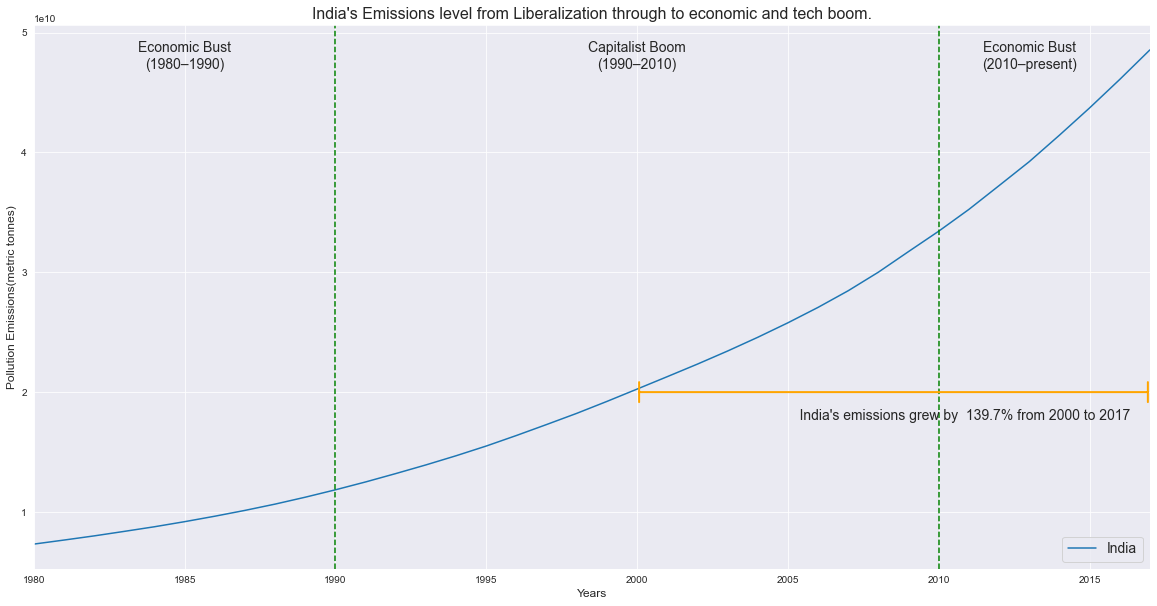

In [11]:
country_list = ['India']

%pylab inline
plt.rcParams["figure.figsize"] = (20,10)
sns.set_style("darkgrid")
beginning_year = '1980'
end_year = '2017'
ax = plt.gca()

for country in country_list:
    plot_emissions(country, beginning_year, end_year).plot(ax = ax)

#indtxt = "1980s: Selective Reform"
plt.ylabel('Pollution Emissions(metric tonnes)', fontsize=12)
plt.xlabel('Years', fontsize=12)
plt.title("India's Emissions level from Liberalization through to economic and tech boom.", fontsize=16)
plt.axvline('1990', color='green', linestyle = '--')
plt.text('1985', 47000000000, "Economic Bust\n(1980–1990)", fontsize=14, horizontalalignment='center')
plt.axvline('2010', color='green', linestyle = '--')
plt.text('2000', 47000000000, "Capitalist Boom\n(1990–2010)", fontsize=14, horizontalalignment='center')
plt.text('2013', 47000000000, "Economic Bust\n(2010–present)", fontsize=14, horizontalalignment='center')
plt.annotate('', xy=('2000', 20000000000), xytext=('2017', 20000000000), xycoords='data', textcoords='data',\
            arrowprops=dict(arrowstyle= '|-|', color="orange", linewidth=2))
plt.annotate("   India's emissions grew by  139.7% from 2000 to 2017", xy=('2005', 18000000000), ha='left', va='center', fontsize=14)
plt.legend(loc='lower right', fontsize=14)
#plt.text(11, 45000000000, indtxt, fontsize=12)
plt.show()

India:

In 1991 then finance minister Manmohan Singh initiated the economic liberalisation of India.  The reforms did away with the Licence Raj, reduced tariffs and interest rates and ended many public monopolies, allowing automatic approval of foreign direct investment in many sectors. These reforms removed the public sector monopoly of various industries and launched a policy of automatic approval for up to 51% of direct foreign investment.

India is the world's second largest consumer of coal after China. Coal has fuelled the rapid growth in Indian electricity use and its coal fleet has more than tripled in size since 2000. In 2017, coal generated 76% of India’s electricity and emissions growth was at 139.7% from 2000 to 2017.

India is the third largest number of vehicles in the world. In 2013 it was estimated that there were 120 million cars registered but with a population of approximately 1.2 billion that year, it gives us a ration of around 18 cars per thousand people.

Manufacturing and construction industries related to the production of cement require large amounts of energy. This energy is provided largely by coal burning powerplants. India was traditionally an agricultural econonmy but the growth in industrialization as increated energy demands while farming villages have been converted to industrial towns.

Economic reforms introduced after 1991 brought foreign competition, led to privatisation of certain public sector industries, opened up sectors hitherto reserved for the public sector and led to an expansion in the production of fast-moving consumer goods.


<u>Sources:</u>
* https://www.carbonbrief.org/the-carbon-brief-profile-india
* https://en.wikipedia.org/wiki/Economic_liberalisation_in_India
* https://en.wikipedia.org/wiki/Economic_history_of_India
* https://www.imf.org/external/pubs/ft/wp/2004/wp0443.pdf
* https://www.researchgate.net/publication/323074098
* https://en.wikipedia.org/wiki/Electricity_sector_in_India
* https://en.wikipedia.org/wiki/Economic_development_in_India
* https://niti.gov.in/writereaddata/files/Energising-India.pdf


In [12]:
print(calculate_growth_percent('India', '1980', '1990'))
print(calculate_growth_percent('India', '1990', '2000'))
print(calculate_growth_percent('India', '2000', '2010'))
print(calculate_growth_percent('India', '2010', '2017'))

61.9
71.0
65.1
45.2


Populating the interactive namespace from numpy and matplotlib


/home/brendan/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/home/brendan/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


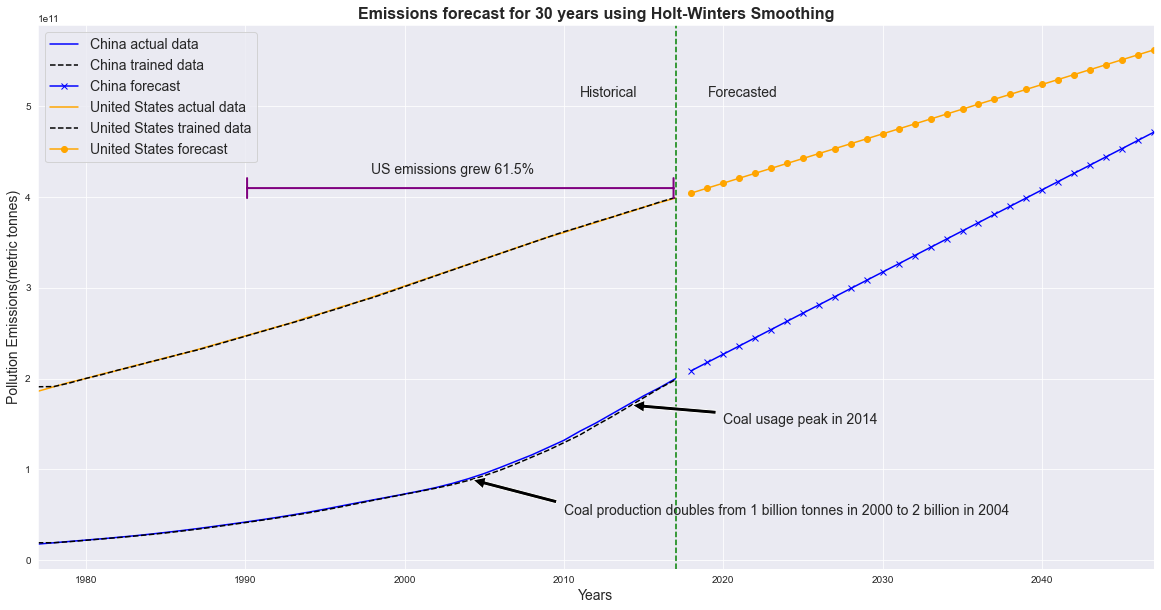

In [13]:
country_forecast_list = ['China', 'United States']


%pylab inline
plt.rcParams["figure.figsize"] = (20,10)
sns.set_style("darkgrid")
lcolor = 'blue'
lmarker = 'x'

for country_fcast in country_forecast_list:
    historical_data = get_historical_data(country_fcast)
    fitted_data = get_fitted_data(historical_data)
    forecast_data = get_forecast_data(fitted_data)
    historical_data.plot(color = lcolor, label= country_fcast+' actual data')
    fitted_data.fittedvalues.plot(color = 'black', linestyle= 'dashed', label= country_fcast+' trained data')
    forecast_data.plot(color = lcolor, marker = lmarker, label= country_fcast+' forecast')
    lcolor = 'orange'
    lmarker = 'o'

ch_coal_pk = emission_df.loc['China','2014']
ch_coal_dbl = emission_df.loc['China','2004']
us_rec_drp = emission_df.loc['United States','2008']

plt.title("Emissions forecast for 30 years using Holt-Winters Smoothing", fontsize=16, fontweight='bold')
plt.xlabel('Years', fontsize=14)
plt.ylabel('Pollution Emissions(metric tonnes)', fontsize=14)
plt.text('2019', 510000000000, "Forecasted", fontsize=14)
plt.text('2011', 510000000000, "Historical", fontsize=14)
plt.annotate('Coal usage peak in 2014', xy=('2014', ch_coal_pk), xytext=('2020', 150000000000),xycoords='data', \
             textcoords='data', arrowprops=dict(facecolor='black', shrink=0.05), fontsize=14)
plt.annotate('Coal production doubles from 1 billion tonnes in 2000 to 2 billion in 2004', xy=('2004', ch_coal_dbl),\
             xytext=('2010', 50000000000),xycoords='data', textcoords='data', arrowprops=dict(facecolor='black', shrink=0.05)\
            , fontsize=14)
plt.annotate('', xy=('1990', 410000000000), xytext=('2017', 410000000000), xycoords='data', textcoords='data',\
            arrowprops=dict(arrowstyle= '|-|', color='purple', linewidth=2))
plt.annotate('US emissions grew 61.5%', xy=('2003', 430000000000), ha='center', va='center', fontsize=14)
#plt.annotate('Emissions dropped due to recession in 2008', xy=('2008', us_rec_drp), xytext=('2012', 320000000000),xycoords='data', \
#             textcoords='data', arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)
plt.axvline('2017', color='green', linestyle = '--')
plt.legend(loc='best', fontsize=14)
plt.grid(True)
plt.show()

China's level of emissions in 2017 is the same as the US' emissions in 1980. From 1995 to 2005, China's emissions grew by 70% and from 2005 to 2015 it grew by 89.8%. Probably due to China's massive manufacturing based economy that has lead to larger energy consumption. Coal remains the foundation of the Chinese energy system, covering close to 70% of the country's primary energy needs and representing 80% of the fuel used in electricity generation. China's emissions grew by 29.5% from 2010 to 2014 which is when it's coal consumption peaked (per analysis in 2016). The emissions then grew by 17% from 2014 to 2017 which is almost half the growth rate during 2010 to 2014.

China is also the worlds largest renewable energy producer, with a capacity of 152 GW. The major renewable energy source in China is hydropower followed by wind and solar. As China is working to increase their reliance on renewable energy over fossil fuel (in accordance to the 2016 Paris Agreement), they have committed to make non-fossil fuel energy 20% of their energy supply by 2030. China's progress indicates that their total carbon emissions will fall by 2025 which is ahead of their 2030 target date.

Assuming the trend stays the same China will surpass the US in 70 years on emissions. Considering that China is adhering to the Paris Agreement we can hope to see their emission growth gradually decrease.

The largest source of emissions in 2017 was transportation at 29%, followed by electricity generation at 28% and industry at 22%.

Unites States emissions growth of 15.9% from 2000 to 2008 but growth dropped to 14% from 2008 to 2017. This drop in emissions is due to the 2008 recession which lead to the economic slowdown and a shift from coal to cleaner-burning natural gas to produce electricity as the price of natural gas has declined. Another factor contributing to the drop in emisions during 2008 to 2017 is the market share of electric passenger cars. By 2011 there were 0.14% electric cars which rose to 1.13% in 2017.

United States' transportaion emissions are a result of combusting of petroleum-based products like gasoline. Passenger cars and light-duty trucks, SUVs, pickup trucks and minivans account for over half of the emissions form the transportation sector. Emissions from freight trucks, commercial aircraft, ships, boats and trains account for the rest of the transportation sector.

From 1990 to 2017 total transportation emissions grew by 61.5% due to the increased demand for travel as the nymber of cars and light-duty trucks increased by 45.9%. This demand was due to population growth, economic growth, urban sprawl and perions of low fuel prices.

Electricity generation accounted for 28% of emissions which is largely due to 67.9% of emissions from coal power plants. Coal combustion is more carbon intensive than burning natural gas or petroleum for electricity. In the United States 31.2% of electricity is generated by coal combustion, 31.2% from natural gas, 21% nuclear and 16.2 from renewable sources like hydroelectricity, biomass, wind and solar. Non-fossil sources like nuclear, hydroelectricity, wind and solar are non-emitting.



<u>Sources:</u>
* https://en.wikipedia.org/wiki/Energy_policy_of_China
* https://chinapower.csis.org/energy-footprint/
* https://www.theguardian.com/environment/2016/jul/25/china-coal-peak-hailed-turning-point-climate-change-battle
* https://en.wikipedia.org/wiki/Coal_in_China#Coal_consumption
* https://www.nature.com/articles/sdata2017201/
* https://en.wikipedia.org/wiki/Greenhouse_gas_emissions_by_the_United_States
* https://www.epa.gov/ghgemissions/sources-greenhouse-gas-emissions
* https://www.nytimes.com/2011/02/17/science/earth/17emit.html
* https://en.wikipedia.org/wiki/Plug-in_electric_vehicles_in_the_United_States#Markets_and_sales


# Older test code beyond this point

In [ ]:
#emission_df.head(20)

In [ ]:
#emission_df['1751'].sum()

In [ ]:
#emission_df.max(axis=1)

In [ ]:
#plot_emissions('United States', '1980','2017')

In [ ]:
'''
country_plot = emission_df.loc['World']
result = country_plot.replace(to_replace = 0.0, value = 1)
country_log_val = np.log10(result)
'''

In [ ]:
start_year = '1760'
end_year = '2010'
industrial_era_data = emission_df.loc['Canada', start_year:end_year]
industrial_era_log_val = np.log10(industrial_era_data.replace(to_replace = 0.0, value = 1))
print(industrial_era_log_val)

In [ ]:
def plot_growth(country, start_year = '1751', end_year = '2017'):
    growth_data = emission_df.loc[country, start_year:end_year]
    #converting to logs
    growth_data_log = np.log10(growth_data.replace(to_replace = 0.0, value = 1))
    return growth_data_log

In [ ]:
plot_growth(['Canada','India'])
#print(np.log10(country_plot))
#print(type(country_log_val))
#print(country_log_val)

In [ ]:
# converting index to DateTime object
def convert_index(country, start_year = '1751', end_year = '2017'):
    train_data = emission_df.loc[country, start_year:end_year]
    #print(type(train_data))
    train_data.index = pd.to_datetime(train_data.index)
    return train_data
    #print(type(train_data.index))
    #print(train_data)

In [ ]:
%pylab inline
plt.rcParams["figure.figsize"] = (20,10)
#country_log_val.plot()
#industrial_era_log_val.plot()
sns.set_style("darkgrid")
beginning_year = '1980'
end_year = '2017'
ax = plt.gca()
#plot_growth('Canada', beginning_year, end_year).plot(marker = 'o', ax = ax)
#plot_growth('Sweden', beginning_year, end_year).plot(color = 'red', marker = 'o', ax = ax)
plot_growth('India', beginning_year, end_year).plot(color = 'green', marker = 'o', ax = ax)
plot_growth('China', beginning_year, end_year).plot(color = 'red', marker = 'o', ax = ax)
plot_growth('United States', beginning_year, end_year).plot(color = 'blue',marker = 'o', ax = ax)
plt.ylabel('Log10(Tonnes of emission)')
plt.xlabel('Years')
ax.legend(loc='best')
plt.show()

In [ ]:
# Plot Emissions data for one or more countries with default data ranges from 1751 to 2017
%pylab inline
plt.rcParams["figure.figsize"] = (20,10)
sns.set_style("darkgrid")
beginning_year = '1920'
end_year = '1950'
ax = plt.gca()
plot_emissions('India', beginning_year, end_year).plot(ax = ax)
plot_emissions('China', beginning_year, end_year).plot(ax = ax)
#plot_emissions('United States', beginning_year, end_year).plot(ax = ax)
plot_emissions('Japan', beginning_year, end_year).plot(ax = ax)
plot_emissions('Canada', beginning_year, end_year).plot(ax = ax)
plt.ylabel('Tonnes of emission')
plt.xlabel('Years')
ax.legend(loc='best')
plt.show()

In [ ]:
country1 = 'China'
country2 = 'United States'
country_datat1 = country_to_forecast(country1)
country_datat2 = country_to_forecast(country2)
fit1 = Holt(country_datat1).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast1 = fit1.forecast(20).rename("Holt's trend")

fit2 = Holt(country_datat2).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast2 = fit2.forecast(20).rename("Holt's trend")

#fit2 = Holt(train_data, exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
#fcast2 = fit2.forecast(20).rename("Exponential trend")


#fit3 = Holt(train_data, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
#fcast3 = fit3.forecast(20).rename("Additive damped trend")
%pylab inline
plt.rcParams["figure.figsize"] = (20,10)

ax = country_datat1.plot(color="red")
                         #figsize=(12,8))
#country_datat1.plot(ax = ax, color='red')
country_datat2.plot(ax=ax, color='blue')
#fit3.fittedvalues.plot(ax=ax, marker="o", color='orange')
fcast1.plot(ax=ax, color='red', marker='x')
fcast2.plot(ax=ax, color='blue', marker='o')
#fcast2.plot(ax=ax, color='green', marker='v', legend=True)
#fcast3.plot(ax=ax, color='red', marker="o", legend=True)
plt.xlabel('Years')
plt.ylabel('Tonnes of emission')
ax.legend(loc='best')
plt.grid(True)
plt.show()
#print(fcast1)

In [ ]:
"""
# calculating slope of graph
country_slope = 'Canada'
number_of_years = 30
first_year = 2017 - number_of_years
x1 = first_year
x2 = 2017
y1 = np.log10(emission_df.loc[country_slope, str(first_year)])
y2 = np.log10(emission_df.loc[country_slope, str(x2)])

slope_of_line = (y2 - y1) / (x2 - x1)

ny1 = emission_df.loc[country_slope, str(first_year)]
ny2 = emission_df.loc[country_slope, str(x2)]

slope_actual_val = (ny2 - ny1) / (x2 - x1)
"""

In [ ]:
'''
print(x1, x2, y1, y2)
print(round(slope_of_line,4))
print(np.exp(y1))
print(ny1)
print(np.exp(y2))
print(ny2)
print(np.log(round(slope_actual_val,4)))
'''

In [ ]:
'''
# Predict y2 30 years from 2017 for country_slope
px1 = 2017
px2 = px1 + 30
py1 = np.log10(emission_df.loc[country_slope, str(px1)])
py2 = (slope_of_line * (px2 - px1)) + py1

print(py2)
'''

In [ ]:
country_predict_df = pd.DataFrame([country_predict_data], columns=country_predict_columns)
country_predict_df = country_predict_df.set_index(country_predict_df.columns[0])

print(country_predict_df)

In [ ]:
#country_predict_df.plot(ax = ax)

In [ ]:
'''
# using ARIMA for predictions
# Calculating correlation
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(emission_df.loc['Canada'])
'''

In [ ]:
'''
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(emission_df.loc['Poland'], order=(3,1,0))
model_fit = model.fit(disp=0)
model_fit.summary()
'''

In [ ]:
'''
# Determining the order of difference 'd'

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

country_test = emission_df.loc['Poland']
result = adfuller(country_test.values)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
'''

In [ ]:
'''
# Original Series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})


fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(country_test.values); axes[0, 0].set_title('Original Series')
#axes[0,1].set(ylim=(-0.5,1.1))
plot_acf(country_test.values, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(np.diff(country_test.values)); axes[1, 0].set_title('1st Order Differencing')
plot_acf(np.diff(country_test.values), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(np.diff(np.diff(country_test.values))); axes[2, 0].set_title('2nd Order Differencing')
plot_acf((np.diff(np.diff(country_test.values))), ax=axes[2, 1])

plt.show()
'''

In [ ]:
# based on above result use d = 1

In [ ]:
'''
# determining AR (p)

# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 3, sharex=True)
axes[0].plot(np.diff(country_test.values)); axes[0].set_title('1st Differencing')
#axes[1].set(ylim=(-0.5,1.1))
plot_acf(np.diff(country_test.values), ax=axes[1])
plot_pacf(np.diff(country_test.values), ax=axes[2])

plt.show()
'''

In [ ]:
'''
# PACF plot of 2nd differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(np.diff(np.diff(country_test.values))); axes[0].set_title('2nd Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(np.diff(np.diff(country_test.values)), ax=axes[1])

plt.show()
'''

In [ ]:
# AR (p) = 1

In [ ]:
'''
# Determining MA (q)

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(np.diff(country_test.values)); axes[0].set_title('1st Order Differencing')
axes[1].set(ylim=(0, 1.5))
#axes[1].set(xlim=(0, 50))
plot_acf(np.diff(country_test.values), ax=axes[1])

plt.show()
'''

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

length = np.random.random(10)
length.sort()
time = np.random.random(10)
time.sort()
slope, intercept = np.polyfit(np.log(length), np.log(time), 1)
print(length)
print(time)
print(slope)
plt.loglog(length, time, '--')
plt.show()

In [ ]:
# find countries that lowered CO2 emissions
#emission_df.loc['Canada'].idxmax()
max_val_column = emission_df.idxmax(axis=1)
for x in max_val_column.values:
    if x != '2017':
        print(x, " -> ", max_val_column[max_val_column == x].index[0])

In [ ]:
# Get column/year with first value != 0.0
country = 'Germany'
country_data = emission_df.loc[country]
for c in country_data:
    if c > 0.0:
        print(country_data[country_data == c].index[0], " ---- ", c)
        break

In [ ]:
# simple exponential smoothing (0,1,1) or (0,2,1) or (0,2,2) for linear exponential smoothing

In [ ]:
#country_to_forecast('Canada')

In [16]:
print(calculate_growth_percent('United States', '1990', '2017'))
print(calculate_growth_percent('China', '1990', '2017'))
print(calculate_growth_percent('India', '1990', '2017'))

61.5
378.4
309.8


In [17]:
print(emission_df.loc['China', '1995'])
print(emission_df.loc['China', '2005'])
print(emission_df.loc['China', '2015'])

56109578888.0
95363763560.0
181000000000.0


/home/brendan/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/home/brendan/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


Populating the interactive namespace from numpy and matplotlib


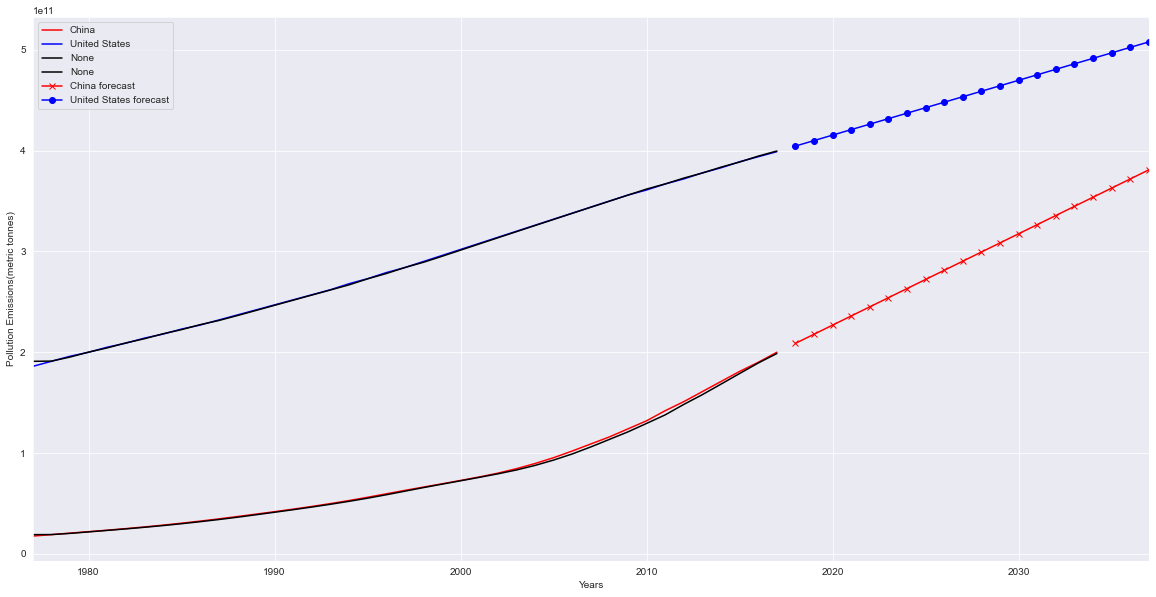

In [14]:
country1 = 'China'
country2 = 'United States'
country_datat1 = country_to_forecast(country1)
country_datat2 = country_to_forecast(country2)
fit1 = Holt(country_datat1).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast1 = fit1.forecast(20).rename(country1+" forecast")

fit2 = Holt(country_datat2).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast2 = fit2.forecast(20).rename(country2+" forecast")


%pylab inline
plt.rcParams["figure.figsize"] = (20,10)

ax = country_datat1.plot(color="red")
country_datat2.plot(ax=ax, color='blue')
fit1.fittedvalues.plot(ax=ax, color='black')
fit2.fittedvalues.plot(ax=ax, color='black')
fcast1.plot(ax=ax, color='red', marker='x')
fcast2.plot(ax=ax, color='blue', marker='o')
plt.xlabel('Years')
plt.ylabel('Pollution Emissions(metric tonnes)')
ax.legend(loc='best')
plt.grid(True)
plt.show()


In [15]:
print(fcast1, fcast2)

2018-01-01    2.088060e+11
2019-01-01    2.178675e+11
2020-01-01    2.269290e+11
2021-01-01    2.359905e+11
2022-01-01    2.450519e+11
2023-01-01    2.541134e+11
2024-01-01    2.631749e+11
2025-01-01    2.722364e+11
2026-01-01    2.812979e+11
2027-01-01    2.903594e+11
2028-01-01    2.994209e+11
2029-01-01    3.084824e+11
2030-01-01    3.175439e+11
2031-01-01    3.266054e+11
2032-01-01    3.356668e+11
2033-01-01    3.447283e+11
2034-01-01    3.537898e+11
2035-01-01    3.628513e+11
2036-01-01    3.719128e+11
2037-01-01    3.809743e+11
Freq: AS-JAN, Name: China forecast, dtype: float64 2018-01-01    4.045715e+11
2019-01-01    4.100107e+11
2020-01-01    4.154499e+11
2021-01-01    4.208890e+11
2022-01-01    4.263282e+11
2023-01-01    4.317673e+11
2024-01-01    4.372065e+11
2025-01-01    4.426456e+11
2026-01-01    4.480848e+11
2027-01-01    4.535239e+11
2028-01-01    4.589631e+11
2029-01-01    4.644022e+11
2030-01-01    4.698414e+11
2031-01-01    4.752806e+11
2032-01-01    4.807197e+11
2033